In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)

sns.set_theme(style="whitegrid")

In [4]:
def data_quality_report(df):
    
    if isinstance(df, pd.core.frame.DataFrame):
        
        descriptive_statistics = df.describe(include = 'all')
        data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()
        missing_value_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).transpose()
        present_value_counts = pd.DataFrame(df.count(), columns=['Present Values']).transpose()
        data_report = pd.concat([descriptive_statistics, data_types, missing_value_counts, present_value_counts], axis=0)
        
        return data_report
    
    else:
    
        return None

In [5]:
df = pd.read_csv('w10/Week10/Practical Lab//data/Forbes2000.csv', encoding='ISO-8859-1', index_col=0)
df

,rank,name,country,category,sales,profits,assets,marketvalue
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54
...,...,...,...,...,...,...,...,...
1996,1996,Siam City Bank,Thailand,Banking,0.48,0.02,11.27,1.47
1997,1997,Yokogawa Electric,Japan,Business services & supplies,2.78,-0.22,2.96,3.29
1998,1998,Hindalco Industries,India,Materials,1.35,0.14,2.47,2.76
1999,1999,Nexans,France,Capital goods,5.09,0.00,2.71,0.88


In [6]:
# a
data_quality_report(df)

,rank,name,country,category,sales,profits,assets,marketvalue
count,2000.0,2000,2000,2000,2000.0,1995.0,2000.0,2000.0
unique,NaN,2000,61,27,NaN,NaN,NaN,NaN
top,NaN,Citigroup,United States,Banking,NaN,NaN,NaN,NaN
freq,NaN,1,751,313,NaN,NaN,NaN,NaN
mean,1000.5,NaN,NaN,NaN,9.69701,0.381133,34.04185,11.877655
std,577.494589,NaN,NaN,NaN,18.002592,1.765454,99.678786,24.460197
min,1.0,NaN,NaN,NaN,0.01,-25.83,0.27,0.02
25%,500.75,NaN,NaN,NaN,2.0175,0.08,4.025,2.72
50%,1000.5,NaN,NaN,NaN,4.365,0.2,9.345,5.15
75%,1500.25,NaN,NaN,NaN,9.5475,0.44,22.7925,10.6025


In [7]:
# b
df = df.dropna()
data_quality_report(df)

,rank,name,country,category,sales,profits,assets,marketvalue
count,1995.0,1995,1995,1995,1995.0,1995.0,1995.0,1995.0
unique,NaN,1995,61,27,NaN,NaN,NaN,NaN
top,NaN,Citigroup,United States,Banking,NaN,NaN,NaN,NaN
freq,NaN,1,748,313,NaN,NaN,NaN,NaN
mean,999.858647,NaN,NaN,NaN,9.709003,0.381133,34.06815,11.899183
std,577.752261,NaN,NaN,NaN,18.023506,1.765454,99.797418,24.486723
min,1.0,NaN,NaN,NaN,0.01,-25.83,0.27,0.02
25%,499.5,NaN,NaN,NaN,2.01,0.08,4.02,2.72
50%,999.0,NaN,NaN,NaN,4.36,0.2,9.33,5.15
75%,1500.5,NaN,NaN,NaN,9.575,0.44,22.745,10.62


<Axes: >

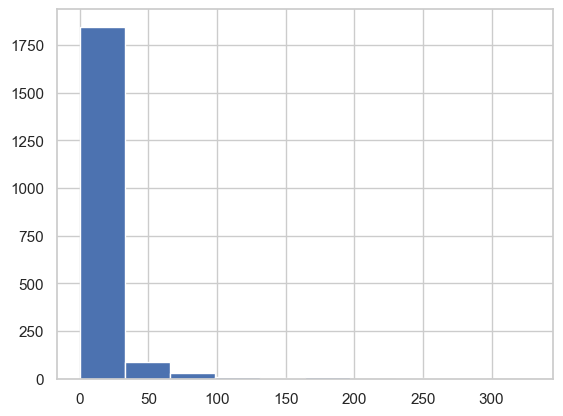

In [8]:
# c
df['marketvalue'].hist()

In [9]:
print('Skewness of marketvalue is {}'.format(df['marketvalue'].skew()))

Skewness of marketvalue is 6.429583886138453


<Axes: >

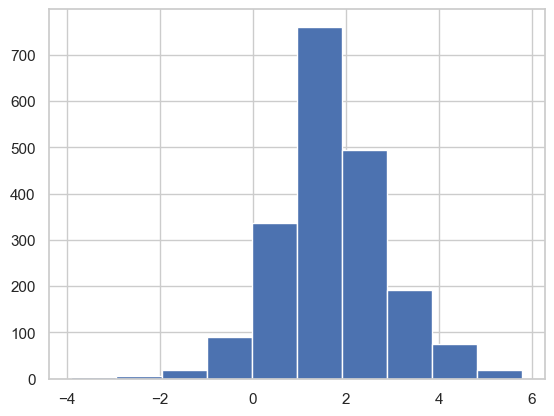

In [10]:
# d
# log transformation
df.loc[:, ['logmarketvalue']] = np.log(df['marketvalue'])
plt.figure()
df['logmarketvalue'].hist()

In [12]:
print('Skewness of log marketvalue is {}'.format(df['logmarketvalue'].skew()))

Skewness of log marketvalue is 0.03570540647192163


<Axes: xlabel='category', ylabel='country'>

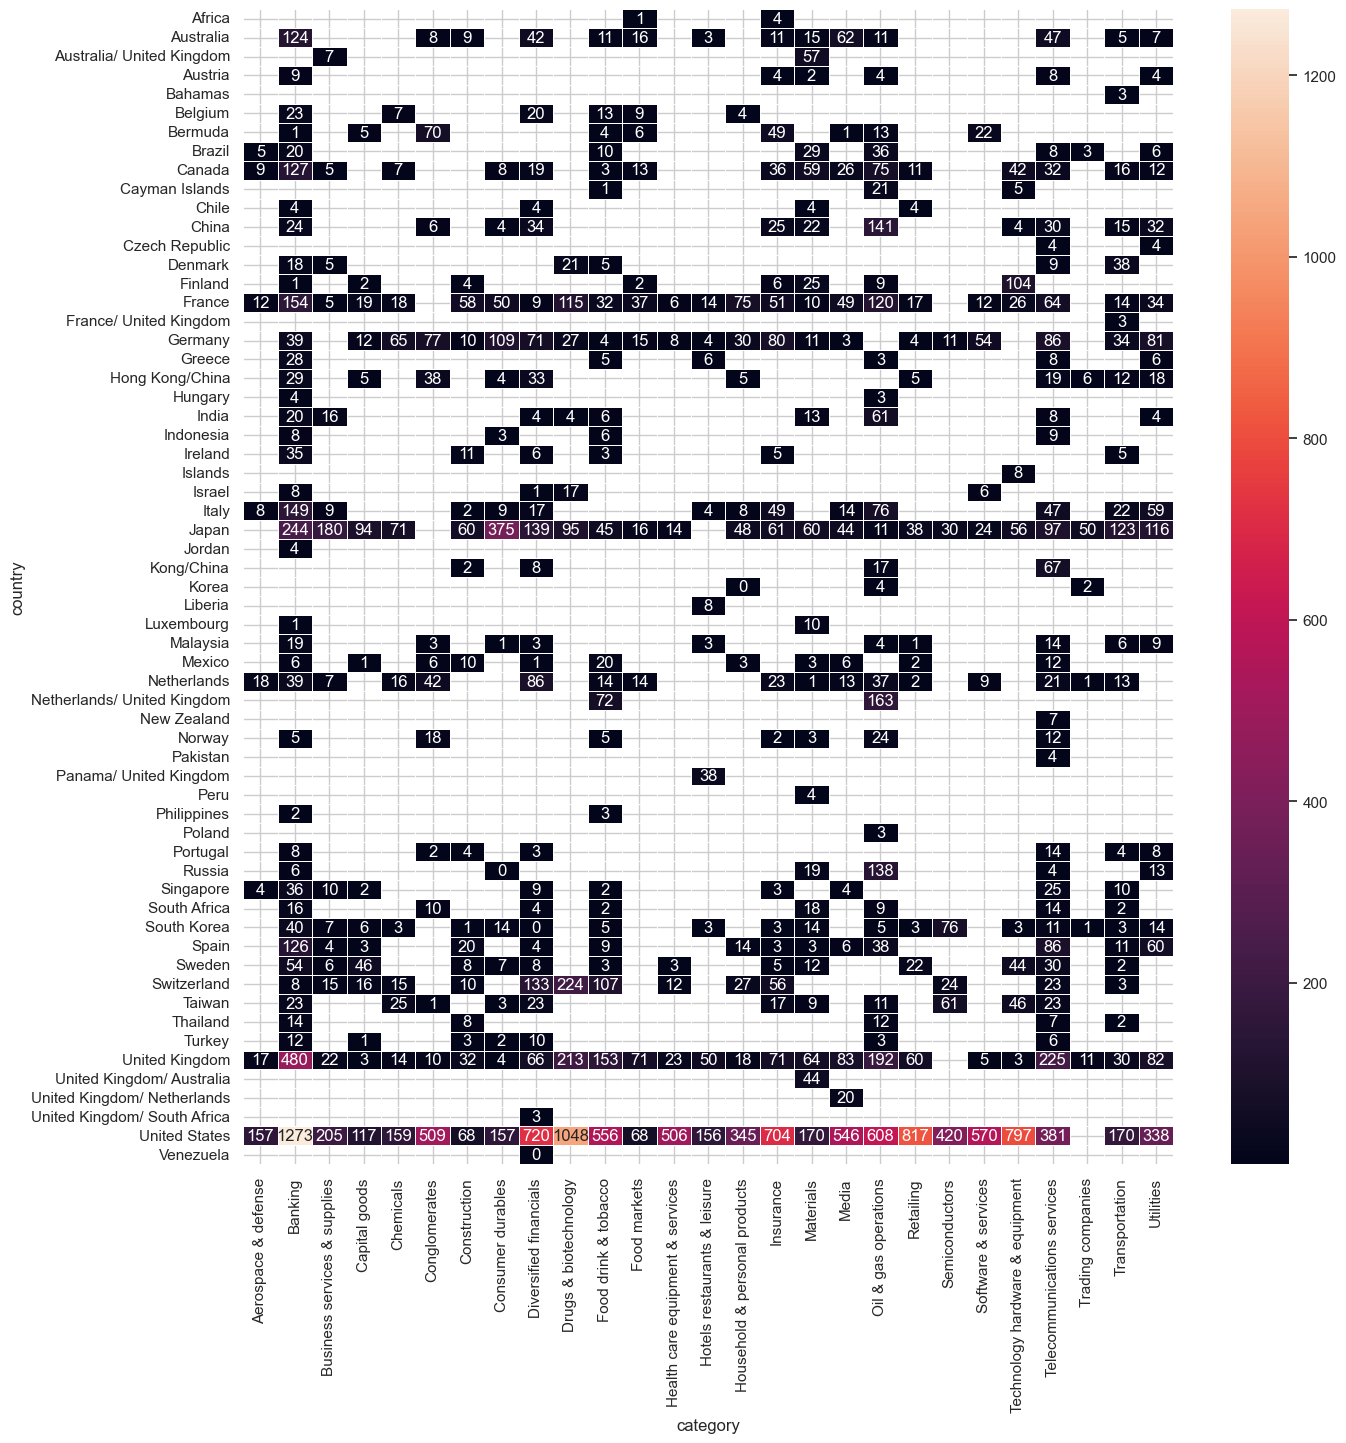

In [11]:
# e
pivot = pd.pivot_table(df, index=['country'], columns=['category'], values='marketvalue', aggfunc='sum')
# Change figsize in inches
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(pivot, annot=True, fmt=".0f", xticklabels=True, yticklabels=True, linewidths=0.5, ax=ax)

In [13]:
# f
df_lr = df.drop(['rank', 'name', 'country', 'category', 'logmarketvalue'], axis=1)
print(df_lr.corr(method='pearson'))

                sales   profits    assets  marketvalue
sales        1.000000  0.404267  0.426136     0.641990
profits      0.404267  1.000000  0.224357     0.547220
assets       0.426136  0.224357  1.000000     0.453995
marketvalue  0.641990  0.547220  0.453995     1.000000


<Axes: >

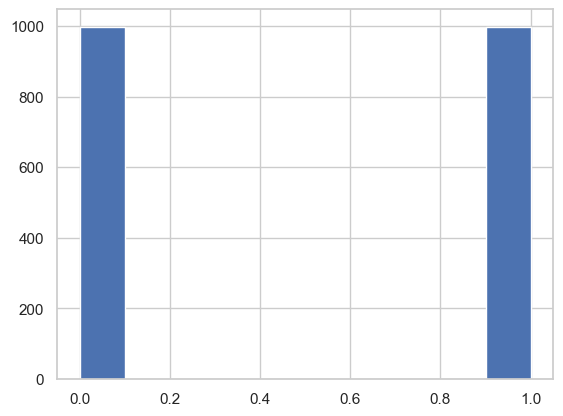

In [14]:
# g
df.loc[:, ['marketvalue_binary']] = np.where(df['marketvalue'] <= df['marketvalue'].median(),0,1)
df['marketvalue_binary'].hist()